<a href="https://colab.research.google.com/github/prasadwagh2503/Cardiovascular-Risk-Prediction/blob/main/Prasad_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Prasad Wagh**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In [ ]:
%%html
<marquee style='width:100%;'><b><u><h1 style="color:#008000;font-family:fallback;">Cardiovascular Risk Prediction</b></u></marquee>

time: 6.79 ms (started: 2023-02-12 15:01:45 +00:00)


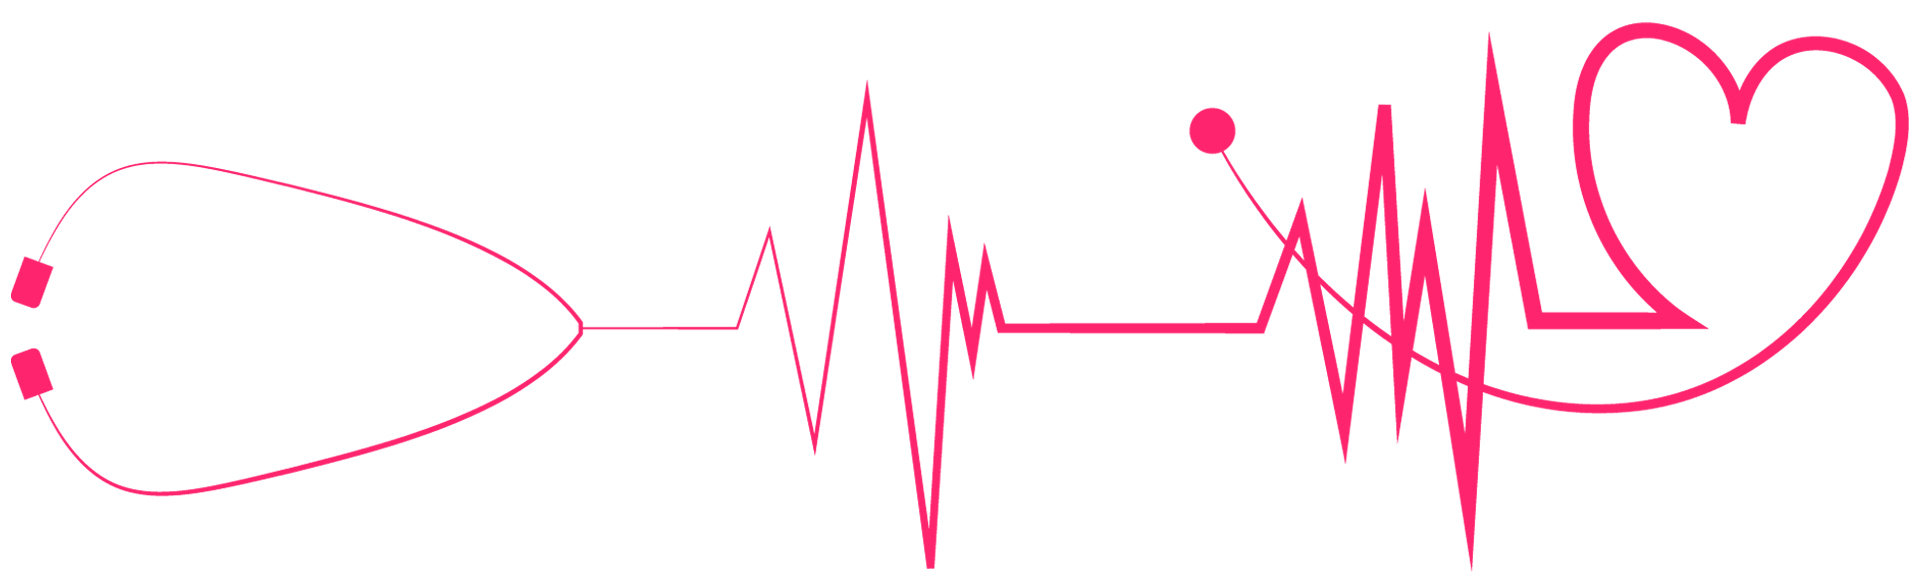

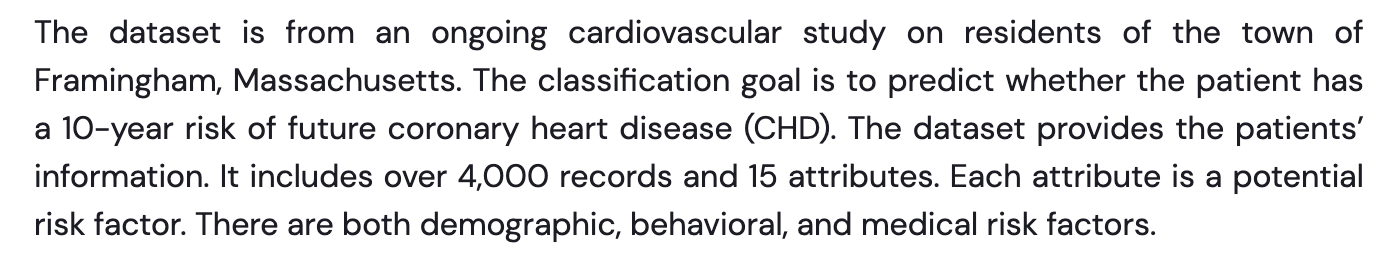

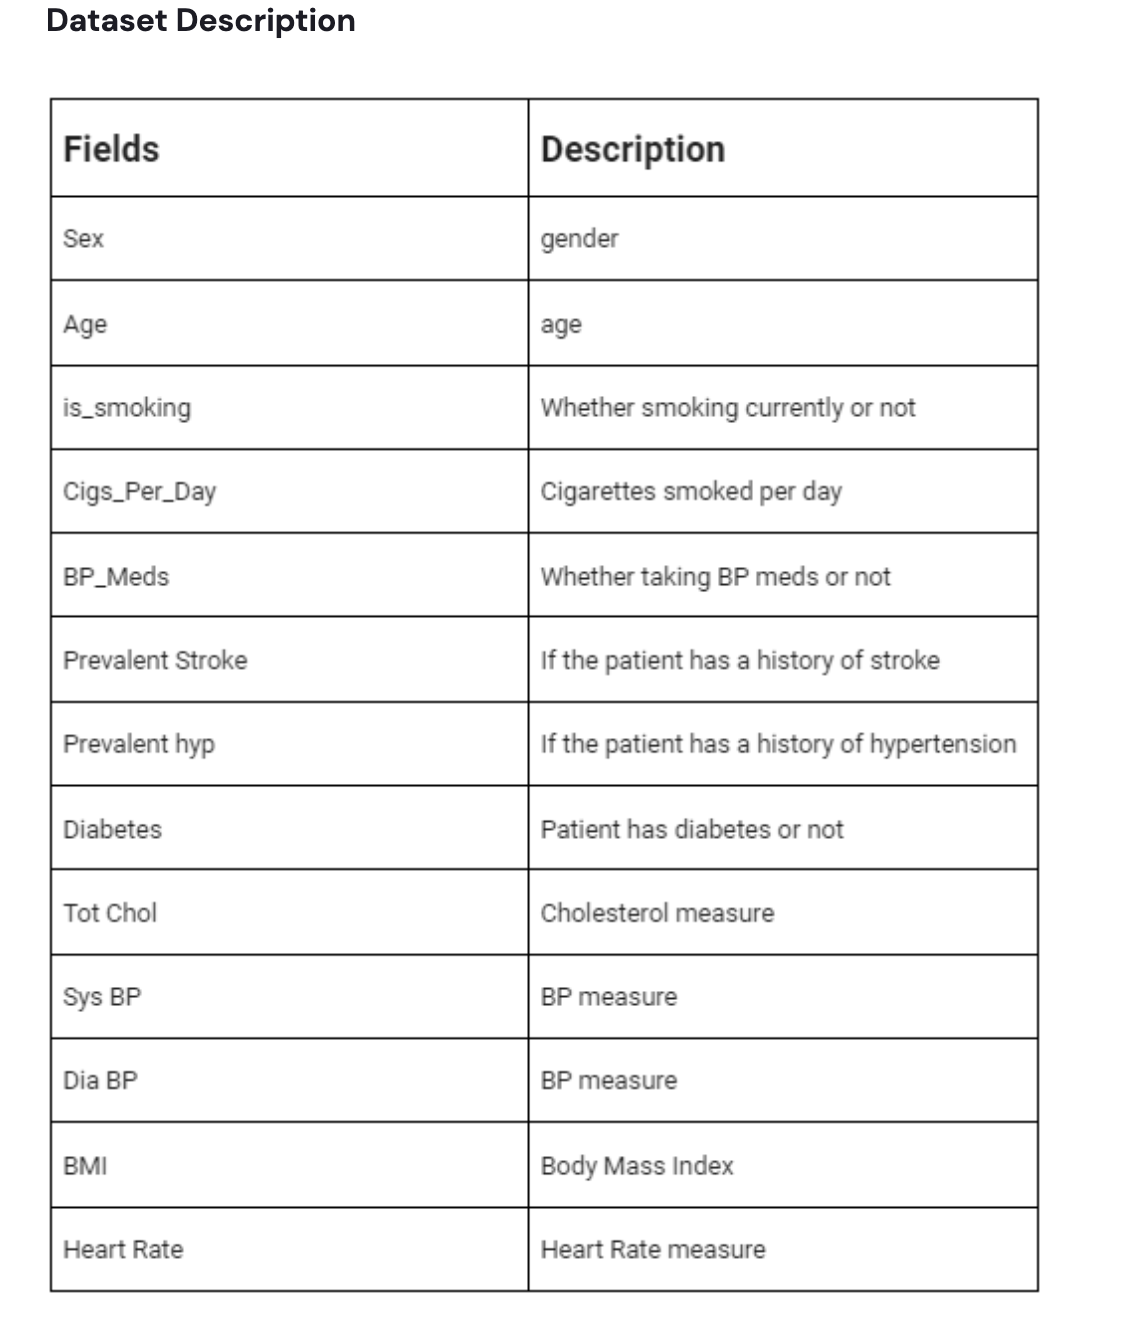

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# code to see the execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00
time: 515 µs (started: 2023-02-12 12:56:58 +00:00)


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 27.3 s (started: 2023-02-12 12:56:58 +00:00)


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone 3 : Classification/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

time: 773 ms (started: 2023-02-12 12:57:26 +00:00)


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


time: 46.1 ms (started: 2023-02-12 12:57:27 +00:00)


In [ ]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


time: 24.4 ms (started: 2023-02-12 12:57:27 +00:00)


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Rows={df.shape[0]}, Columns={df.shape[1]}") 

Rows=3390, Columns=17
time: 6.41 ms (started: 2023-02-12 12:57:27 +00:00)


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in the dataset: {df.duplicated().sum()}")

Number of duplicated rows in the dataset: 0
time: 19.8 ms (started: 2023-02-12 12:57:27 +00:00)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(f"Null values in the dataset:\n{df.isna().sum()}\n")

print("-"*50)

print(f"Infinite values in the dataset:\n{df.isin([np.inf, -np.inf]).sum()}\n")

Null values in the dataset:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

--------------------------------------------------
Infinite values in the dataset:
id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

time: 29.3 ms (started: 2023-02-12 12:57:27 +00:00)


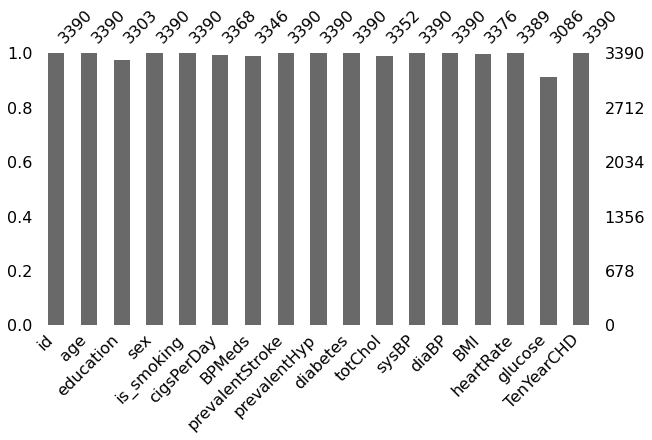

time: 1.31 s (started: 2023-02-12 12:57:27 +00:00)


In [ ]:
# Visualizing the missing values

msno.bar(df,figsize=(10,5))

### What did you know about your dataset?

Our datatset is from the ongoing study of Framingham city. It has 3390 rows and 17 columns. Our aim is to build a classification model which predicts if the patient has 10-year risk of CHD based on various attributes(habits).


1.   Our target variable is TenYearCHD and it contains no null values. Since the prediction can be 'Yes' or 'No', it is a classification problem.
2.   Out of 17 columns, 7 attributes are seen with null values and we would have to treat them later.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

time: 9.24 ms (started: 2023-02-12 12:57:28 +00:00)


In [ ]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


time: 56.9 ms (started: 2023-02-12 12:57:28 +00:00)


### Variables Description 




**Demographic**:

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

• Sex: male or female("M" or "F")

• Education: Person's educational background (1,2,3,4)



**Behavioral**: 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day (can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 



**Medical history:** 

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 



**Current Medical Issues:**

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 


**Target Variable:**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) 



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("Unique values in",i,":",df[i].nunique())

Unique values in id : 3390
Unique values in age : 39
Unique values in education : 4
Unique values in sex : 2
Unique values in is_smoking : 2
Unique values in cigsPerDay : 32
Unique values in BPMeds : 2
Unique values in prevalentStroke : 2
Unique values in prevalentHyp : 2
Unique values in diabetes : 2
Unique values in totChol : 240
Unique values in sysBP : 226
Unique values in diaBP : 142
Unique values in BMI : 1259
Unique values in heartRate : 68
Unique values in glucose : 132
Unique values in TenYearCHD : 2
time: 37.6 ms (started: 2023-02-12 12:57:28 +00:00)


## 3. ***Data Wrangling***

###**Droping unwanted feature/s:**

In [ ]:
#Droping the id column
df.drop('id', axis = 1, inplace = True)

time: 3.31 ms (started: 2023-02-12 12:57:28 +00:00)


###**Treating the Null values**

In [ ]:
# Summing null values
df.isna().sum()[df.isna().sum() > 0]

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

time: 11.1 ms (started: 2023-02-12 12:57:28 +00:00)


In [ ]:
# Understanding value counts of Education
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

time: 7.63 ms (started: 2023-02-12 12:57:28 +00:00)


In [ ]:
# Understanding value counts of cigsPerDay
df['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

time: 8.78 ms (started: 2023-02-12 12:57:28 +00:00)


In [ ]:
# Understanding value counts of BP Meds
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

time: 8.15 ms (started: 2023-02-12 12:57:28 +00:00)


In [ ]:
# Understanding value counts of totChol
df['totChol'].value_counts()

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
137.0     1
113.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

time: 9.8 ms (started: 2023-02-12 12:57:28 +00:00)


In [ ]:
# Understanding value counts of BMI
df['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
23.48    12
25.09    12
         ..
19.54     1
19.87     1
35.01     1
21.29     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

time: 10.5 ms (started: 2023-02-12 12:57:28 +00:00)


In [ ]:
# Understanding value counts of heartRate
df['heartRate'].value_counts()

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

time: 11.5 ms (started: 2023-02-12 12:57:28 +00:00)


In [ ]:
# Understanding value counts of glucose
df['glucose'].value_counts()

75.0     149
83.0     135
70.0     123
77.0     122
80.0     118
        ... 
191.0      1
119.0      1
43.0       1
256.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

time: 12.2 ms (started: 2023-02-12 12:57:29 +00:00)


Since the given dataset is not very big and we have just 3390 rows, we can't drop rows with null values. We will feel them with appropriate options.


1.   Education and BPMeds are categorial columns and hence we will use **'Mode'** to treat the null values in them.
2.   CigsPerDay, totChol, BMI, heartRate and glucose are continuous columns and hence **'Median'**  would be the most approapriate way to replace the null values.



In [ ]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])

time: 1.13 ms (started: 2023-02-12 12:57:29 +00:00)


In [ ]:
# Applying the function to fill null values of the column with mode
mode_fillna(df = df, columns = ['education','BPMeds'])

time: 2.7 ms (started: 2023-02-12 12:57:29 +00:00)


In [ ]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())

time: 1.1 ms (started: 2023-02-12 12:57:29 +00:00)


In [ ]:
# Applying the function to fill null values of continous columns with the median
median_fillna(df = df, columns = ['cigsPerDay','totChol','BMI','heartRate','glucose'])

time: 6.11 ms (started: 2023-02-12 12:57:29 +00:00)


In [ ]:
# Checking for null values after treating the null values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

time: 7.06 ms (started: 2023-02-12 12:57:29 +00:00)


All the null values of the dataset has been successfully treated!


### **Treating Mis-filled Data:**

In [ ]:
# No cigarettes smoked though the smoking column is yes
df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0)].head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,0.0,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,0.0,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
491,61,1.0,F,YES,0.0,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,0.0,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0


time: 28.1 ms (started: 2023-02-12 12:57:29 +00:00)


Here, we can see even if the person is not smoking any cigarettes, some of the observations from 'is_smoking' attritude have been classified as 'Yes'. We need to change such observations to 'No'.

In [ ]:
# Correcting the 'is_smoking' column to 'NO' where no cigarettes are smoked.
df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

time: 3.01 ms (started: 2023-02-12 12:57:29 +00:00)


In [ ]:
#Rechecking the data

df.loc[(df['is_smoking'] == 'YES') & (df['cigsPerDay'] == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


time: 13.6 ms (started: 2023-02-12 12:57:29 +00:00)



### **Typecasting:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB
t

Typecasting all the float dtypes into int for the future use.

In [ ]:
df["education"]= df["education"].astype(int)
df["cigsPerDay"]= df["cigsPerDay"].astype(int)
df["BPMeds"]= df["BPMeds"].astype(int)
df["totChol"]= df["totChol"].astype(int)
df["sysBP"]= df["sysBP"].astype(int)
df["diaBP"]= df["diaBP"].astype(int)
df["BMI"]= df["BMI"].astype(int)
df["heartRate"]= df["heartRate"].astype(int)
df["glucose"]= df["glucose"].astype(int)

time: 8.21 ms (started: 2023-02-12 12:57:29 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3390 non-null   int64 
 1   education        3390 non-null   int64 
 2   sex              3390 non-null   object
 3   is_smoking       3390 non-null   object
 4   cigsPerDay       3390 non-null   int64 
 5   BPMeds           3390 non-null   int64 
 6   prevalentStroke  3390 non-null   int64 
 7   prevalentHyp     3390 non-null   int64 
 8   diabetes         3390 non-null   int64 
 9   totChol          3390 non-null   int64 
 10  sysBP            3390 non-null   int64 
 11  diaBP            3390 non-null   int64 
 12  BMI              3390 non-null   int64 
 13  heartRate        3390 non-null   int64 
 14  glucose          3390 non-null   int64 
 15  TenYearCHD       3390 non-null   int64 
dtypes: int64(14), object(2)
memory usage: 423.9+ KB
time: 13.9 ms (started: 2023-0

### What all manipulations have you done and insights you found?

As of now, we have done a few manipulations as:


1.   We dropped the **id** column as it was no use for predicting the target variable.

2.   We have treated the null values in order to make our data more wholesome. **Education** and **BPMeds** are categorial columns and hence we used '**Mode**' to treat the null values in them. **CigsPerDay, totChol, BMI, heartRate and glucose** are continuous columns and hence we used **'Median'** to treat the null values in them.

3. We treated some mis-filled information in the **is_smoking** column.

4. Typecasted all the float dtypes into integer.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Now we will do data visualization in a structured way following the commonly followed ' UBM ' rule:

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

###**Univariate Analysis**

#### Chart - 1: Distibution of target variable: TenYearCHD:

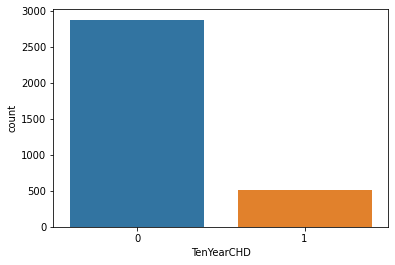

time: 215 ms (started: 2023-02-12 12:57:29 +00:00)


In [ ]:
# Distribution of our dependent variable
sns.countplot(df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

time: 428 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

time: 404 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

time: 428 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

time: 391 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

time: 422 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

time: 393 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

time: 2.48 ms (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

time: 436 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

time: 410 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

time: 405 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

time: 425 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

time: 439 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

time: 407 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

time: 381 µs (started: 2023-02-12 12:57:29 +00:00)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

time: 467 µs (started: 2023-02-12 12:57:29 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

time: 426 µs (started: 2023-02-12 12:57:29 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

time: 389 µs (started: 2023-02-12 12:57:29 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

time: 19.4 ms (started: 2023-02-12 12:57:29 +00:00)


We have already handled the missing values. Hence the count is zero for each attribute.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have treated the null values in order to make our data more wholesome. **Education** and **BPMeds** are categorial columns and hence we used '**Mode**' to treat the null values in them. **CigsPerDay, totChol, BMI, heartRate and glucose** are continuous columns and hence we used '**Median**' to treat the null values in them.

### 2. Handling Outliers

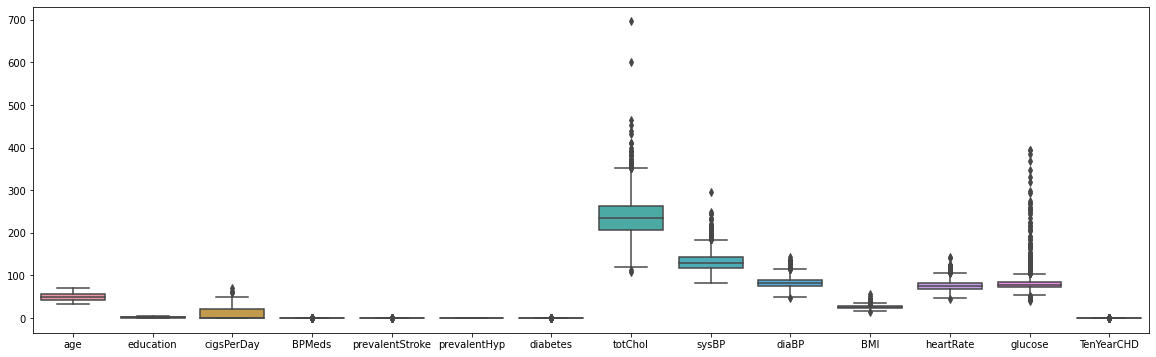

time: 680 ms (started: 2023-02-12 12:57:29 +00:00)


In [ ]:
# Handling Outliers & Outlier treatments
# Boxplot for all columns
plt.figure(figsize=(20,6))
sns.boxplot(data=df)

In [ ]:
# assigning different variable features into new variables so that it makes sense while visulatizing through box plots

dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

time: 1.13 ms (started: 2023-02-12 12:57:30 +00:00)


Let's define a code to detect the number of outliers and percentage of outliers present in each of the feature in order to handle them accordingly.

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

time: 8.01 ms (started: 2023-02-12 12:57:30 +00:00)


In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continuous_var:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

age :
q1:42.0, q2:49.0, q3:56.0
Lower bound: 21.0, Upper bound: 77.0, IQR: 14.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


cigsPerDay :
q1:0.0, q2:0.0, q3:20.0
Lower bound: -30.0, Upper bound: 50.0, IQR: 20.0
Total number of outliers are: 9
Total percentage of outlier is: 0.27 %


totChol :
q1:206.0, q2:234.0, q3:264.0
Lower bound: 119.0, Upper bound: 351.0, IQR: 58.0
Total number of outliers are: 43
Total percentage of outlier is: 1.27 %


sysBP :
q1:117.0, q2:128.0, q3:144.0
Lower bound: 76.5, Upper bound: 184.5, IQR: 27.0
Total number of outliers are: 105
Total percentage of outlier is: 3.1 %


diaBP :
q1:74.0, q2:82.0, q3:90.0
Lower bound: 50.0, Upper bound: 114.0, IQR: 16.0
Total number of outliers are: 52
Total percentage of outlier is: 1.53 %


BMI :
q1:23.0, q2:25.0, q3:27.75
Lower bound: 15.875, Upper bound: 34.875, IQR: 4.75
Total number of outliers are: 96
Total percentage of outlier is: 2.83 %


heartRate :
q1:68.0, q2:75.0, q3:83.0
Lower bound:

In [ ]:
categorical_var1=['education','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

time: 711 µs (started: 2023-02-12 12:57:30 +00:00)


In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the categorical feature
for feature in categorical_var1:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

education :
q1:1.0, q2:2.0, q3:3.0
Lower bound: -2.0, Upper bound: 6.0, IQR: 2.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


BPMeds :
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 100
Total percentage of outlier is: 2.95 %


prevalentStroke :
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 22
Total percentage of outlier is: 0.65 %


prevalentHyp :
q1:0.0, q2:0.0, q3:1.0
Lower bound: -1.5, Upper bound: 2.5, IQR: 1.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


diabetes :
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 87
Total percentage of outlier is: 2.57 %


time: 83.5 ms (started: 2023-02-12 12:57:30 +00:00)


##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used '**IQR technique**' to find out the outliers and I have found out that for almost all of the variables, outliers are in decent range. Most of the features are having **outliers less than 3%**. Since our data is very small and contains sensitive info related to health, outright removal of outliers would cause removal of many rows with possible risk of CHD. As people with extreme values of Cholestrol, BP, Glucose, BMI etc. are prone to heart diseases. Hence, removal of outliers is not considered.

### 3. Categorical Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3390 non-null   int64 
 1   education        3390 non-null   int64 
 2   sex              3390 non-null   object
 3   is_smoking       3390 non-null   object
 4   cigsPerDay       3390 non-null   int64 
 5   BPMeds           3390 non-null   int64 
 6   prevalentStroke  3390 non-null   int64 
 7   prevalentHyp     3390 non-null   int64 
 8   diabetes         3390 non-null   int64 
 9   totChol          3390 non-null   int64 
 10  sysBP            3390 non-null   int64 
 11  diaBP            3390 non-null   int64 
 12  BMI              3390 non-null   int64 
 13  heartRate        3390 non-null   int64 
 14  glucose          3390 non-null   int64 
 15  TenYearCHD       3390 non-null   int64 
dtypes: int64(14), object(2)
memory usage: 423.9+ KB
time: 118 ms (started: 2023-02

In [ ]:
#Encoding sex and is_smoking columns
df["sex"].replace({"F":0, "M":1}, inplace=True)
df["is_smoking"].replace({"NO":0, "YES":1}, inplace=True)

time: 16.9 ms (started: 2023-02-12 13:33:48 +00:00)


In [ ]:
df.sample(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2157,57,1,1,1,3,0,0,1,0,225,177,120,25,72,96,1
1998,48,1,0,1,35,0,0,1,0,174,154,84,31,72,90,0
1214,41,3,1,0,0,0,0,0,0,215,113,68,25,65,87,0
462,47,1,0,0,0,0,0,0,0,200,126,86,26,73,92,1
2531,54,3,0,0,0,0,0,0,0,230,135,85,19,86,89,0
2204,52,1,0,0,0,0,0,0,0,279,135,86,27,100,72,1
3164,43,1,1,1,20,0,0,0,1,309,124,85,26,70,215,0
1821,34,2,0,0,0,0,0,0,0,189,108,66,20,78,88,0
1403,44,1,1,0,0,0,0,0,0,268,114,83,31,75,76,0
1228,44,2,0,0,0,1,0,1,0,208,142,88,31,69,77,0


time: 42.1 ms (started: 2023-02-12 13:39:52 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              3390 non-null   int64
 1   education        3390 non-null   int64
 2   sex              3390 non-null   int64
 3   is_smoking       3390 non-null   int64
 4   cigsPerDay       3390 non-null   int64
 5   BPMeds           3390 non-null   int64
 6   prevalentStroke  3390 non-null   int64
 7   prevalentHyp     3390 non-null   int64
 8   diabetes         3390 non-null   int64
 9   totChol          3390 non-null   int64
 10  sysBP            3390 non-null   int64
 11  diaBP            3390 non-null   int64
 12  BMI              3390 non-null   int64
 13  heartRate        3390 non-null   int64
 14  glucose          3390 non-null   int64
 15  TenYearCHD       3390 non-null   int64
dtypes: int64(16)
memory usage: 423.9 KB
time: 14.2 ms (started: 2023-02-12 13:41:23 +00:00)


# ONE HOT ENCODING OF CATEGORICAL COLUMNS

### **To avoid further blunders, let's creat a copy of this dataset.**

In [ ]:
df_new=df.copy()

time: 1.5 ms (started: 2023-02-12 13:44:56 +00:00)


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              3390 non-null   int64
 1   education        3390 non-null   int64
 2   sex              3390 non-null   int64
 3   is_smoking       3390 non-null   int64
 4   cigsPerDay       3390 non-null   int64
 5   BPMeds           3390 non-null   int64
 6   prevalentStroke  3390 non-null   int64
 7   prevalentHyp     3390 non-null   int64
 8   diabetes         3390 non-null   int64
 9   totChol          3390 non-null   int64
 10  sysBP            3390 non-null   int64
 11  diaBP            3390 non-null   int64
 12  BMI              3390 non-null   int64
 13  heartRate        3390 non-null   int64
 14  glucose          3390 non-null   int64
 15  TenYearCHD       3390 non-null   int64
dtypes: int64(16)
memory usage: 423.9 KB
time: 25.8 ms (started: 2023-02-12 13:45:07 +00:00)


#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

time: 401 µs (started: 2023-02-12 12:57:30 +00:00)


#### 2. Lower Casing

In [ ]:
# Lower Casing

time: 413 µs (started: 2023-02-12 12:57:30 +00:00)


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

time: 466 µs (started: 2023-02-12 12:57:30 +00:00)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

time: 424 µs (started: 2023-02-12 12:57:30 +00:00)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

time: 423 µs (started: 2023-02-12 12:57:30 +00:00)


In [ ]:
# Remove White spaces

time: 434 µs (started: 2023-02-12 12:57:30 +00:00)


#### 6. Rephrase Text

In [ ]:
# Rephrase Text

time: 424 µs (started: 2023-02-12 12:57:30 +00:00)


#### 7. Tokenization

In [ ]:
# Tokenization

time: 441 µs (started: 2023-02-12 12:57:30 +00:00)


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

time: 451 µs (started: 2023-02-12 12:57:30 +00:00)


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

time: 443 µs (started: 2023-02-12 12:57:30 +00:00)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

time: 417 µs (started: 2023-02-12 12:57:30 +00:00)


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
df_new.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2,0,1,3,0,0,0,0,221,148,85,25,90,80,1
1,36,4,1,0,0,0,0,1,0,212,168,98,29,72,75,0
2,46,1,0,1,10,0,0,0,0,250,116,71,20,88,94,0
3,50,1,1,1,20,0,0,1,0,233,158,88,28,68,94,1
4,64,1,0,1,30,0,0,0,0,241,136,85,26,70,77,0


time: 72.1 ms (started: 2023-02-12 14:08:58 +00:00)


In [ ]:
df_new.sample(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2612,63,1,0,1,20,0,0,0,0,260,168,98,21,85,73,0
1722,39,2,1,1,20,0,0,0,0,230,134,92,28,75,56,0
1938,62,1,0,0,0,0,0,1,1,390,184,83,18,87,47,0
1216,44,4,1,1,20,0,0,1,0,230,138,98,25,75,93,0
259,61,1,0,1,9,0,0,0,0,252,119,77,23,65,65,0


time: 32.4 ms (started: 2023-02-12 14:13:05 +00:00)


We can perform following manipulations on the dataset:


1.   We can add a new column 'pulse pressure', which is the difference between systolic BP and diastolic BP. We can then drop both the columns as pulse pressure gives us the required information.
2.   We can drop column 'education' as it is not related to the target variable and hence would be of no help.
3. Since, the cigsPerDay column is already having the information about smokers and non-smokers, where we can define by the number of cigarettes consumed by patients.So, we will be dropping the 'is_smoking' column.



In [ ]:
# Adding pulse pressure as a column
df_new['pulsePressure'] = df_new['sysBP'] - df_new['diaBP']

time: 4.25 ms (started: 2023-02-12 14:14:21 +00:00)


In [ ]:
# Dropping the systolic and diastolic BP columns
df_new.drop(['sysBP','diaBP'], axis = 1, inplace = True)

time: 5.24 ms (started: 2023-02-12 14:14:45 +00:00)


In [ ]:
df_new.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulsePressure
0,64,2,0,1,3,0,0,0,0,221,25,90,80,1,63
1,36,4,1,0,0,0,0,1,0,212,29,72,75,0,70
2,46,1,0,1,10,0,0,0,0,250,20,88,94,0,45
3,50,1,1,1,20,0,0,1,0,233,28,68,94,1,70
4,64,1,0,1,30,0,0,0,0,241,26,70,77,0,51


time: 65.5 ms (started: 2023-02-12 14:15:02 +00:00)


In [ ]:
# Dropping the education column
df_new.drop(['education'], axis = 1, inplace = True)

time: 16.7 ms (started: 2023-02-12 15:06:54 +00:00)


In [ ]:
# Dropping the is_smoking column
df_new.drop(['is_smoking'], axis = 1, inplace = True)

time: 3.56 ms (started: 2023-02-12 15:12:02 +00:00)


In [ ]:
df_new.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulsePressure
0,64,0,3,0,0,0,0,221,25,90,80,1,63
1,36,1,0,0,0,1,0,212,29,72,75,0,70
2,46,0,10,0,0,0,0,250,20,88,94,0,45
3,50,1,20,0,0,1,0,233,28,68,94,1,70
4,64,0,30,0,0,0,0,241,26,70,77,0,51


time: 13.9 ms (started: 2023-02-12 15:12:05 +00:00)


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

time: 427 µs (started: 2023-02-12 12:57:30 +00:00)


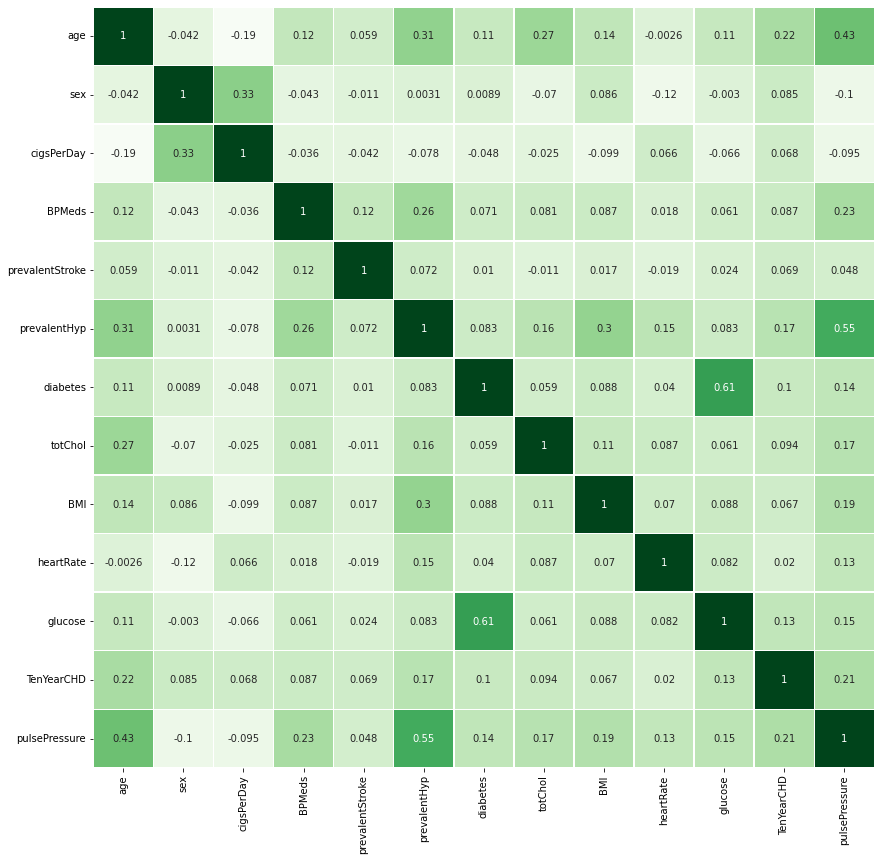

time: 952 ms (started: 2023-02-12 15:45:26 +00:00)


In [ ]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df_new.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlmap,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

Let's include only those features in our final dataframe that are highly impacting on the dependent variable i.e TenYearCHD. For this we are using Variance Inflation Factor technique to determine multicolinearity.

In [ ]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

time: 126 ms (started: 2023-02-12 15:40:38 +00:00)


In [ ]:
# calculating the vif by excluding target variable
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,39.640549
1,sex,2.088134
2,cigsPerDay,1.876504
3,BPMeds,1.132225
4,prevalentStroke,1.026426
5,prevalentHyp,2.096998
6,diabetes,1.546692
7,totChol,29.654604
8,BMI,34.914021
9,heartRate,33.640542


time: 125 ms (started: 2023-02-12 15:41:28 +00:00)


In [ ]:
#Excluding BMI
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['TenYearCHD','BMI']]])

,variables,VIF
0,age,37.739496
1,sex,2.003023
2,cigsPerDay,1.866611
3,BPMeds,1.132195
4,prevalentStroke,1.026426
5,prevalentHyp,2.084892
6,diabetes,1.531963
7,totChol,28.249452
8,heartRate,29.523234
9,glucose,19.378551


time: 199 ms (started: 2023-02-12 15:43:12 +00:00)


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

time: 417 µs (started: 2023-02-12 12:57:30 +00:00)


### 6. Data Scaling

In [ ]:
# Scaling your data

time: 401 µs (started: 2023-02-12 12:57:30 +00:00)


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

time: 400 µs (started: 2023-02-12 12:57:30 +00:00)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

time: 440 µs (started: 2023-02-12 12:57:30 +00:00)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

time: 401 µs (started: 2023-02-12 12:57:30 +00:00)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

time: 382 µs (started: 2023-02-12 12:57:30 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

time: 401 µs (started: 2023-02-12 12:57:30 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 447 µs (started: 2023-02-12 12:57:30 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

time: 394 µs (started: 2023-02-12 12:57:30 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 392 µs (started: 2023-02-12 12:57:30 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

time: 384 µs (started: 2023-02-12 12:57:30 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

time: 397 µs (started: 2023-02-12 12:57:30 +00:00)


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 400 µs (started: 2023-02-12 12:57:30 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

time: 404 µs (started: 2023-02-12 12:57:30 +00:00)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

time: 432 µs (started: 2023-02-12 12:57:30 +00:00)


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***